In [72]:
# 逻辑回归既可以可看作回归问题，也可以看作分类问题。通常作为分类算法用，只可以解决二分类问题
# kNN算法天生支持多分类的问题
# 逻辑算法的损失函数是没有数学公式解的，只能使用梯度下降法

## Sigmoid函数

In [73]:
import numpy as np
import matplotlib.pyplot as plt

In [74]:
# 参数t可以是一个数，也可以是一个向量（由于使用的都是numpy的形式）
def sigmoid(t):
    return 1 / (1 + np.exp(-t))

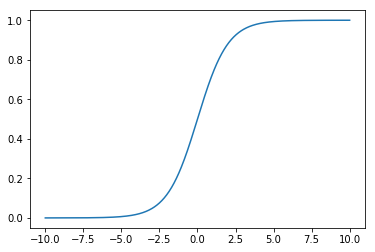

In [75]:
x = np.linspace(-10, 10, 500)
y = sigmoid(x)

plt.plot(x, y)
plt.show()

## 实现逻辑回归

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [77]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [78]:
X = X[y<2, :2]
y = y[y<2]

In [79]:
X.shape

(100, 2)

In [80]:
y.shape

(100,)

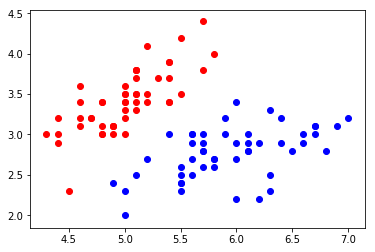

In [81]:
plt.scatter(X[y==0, 0], X[y==0, 1], color='r')
plt.scatter(X[y==1, 0], X[y==1, 1], color='b')
plt.show()

### 使用逻辑回归

In [82]:
from playML.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [83]:
from playML.LogisticRegression import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [84]:
log_reg.score(X_test, y_test)

1.0

In [85]:
log_reg.predict_proba(X_test)

array([0.92972035, 0.98664939, 0.14852024, 0.17601199, 0.0369836 ,
       0.0186637 , 0.04936918, 0.99669244, 0.97993941, 0.74524655,
       0.04473194, 0.00339285, 0.26131273, 0.0369836 , 0.84192923,
       0.79892262, 0.82890209, 0.32358166, 0.06535323, 0.20735334])

In [86]:
y_test

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

In [87]:
log_reg.predict(X_test)

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

In [88]:
log_reg.coef_

# 逻辑回归算法改自与线性回归，相应地也有系数和截距, theta值应该如何解释呢，有没有什么几何意义呢？

array([ 3.01796521, -5.04447145])

In [89]:
log_reg.interception_

-0.6937719272911225

### 决策边界

In [90]:
# 接上：
def X2(X1):
    return -(log_reg.interception_ + log_reg.coef_[0] * X1) / log_reg.coef_[1]

In [91]:
X1_plot = np.linspace(4, 8, 1000)
X2_plot = X2(X1_plot)

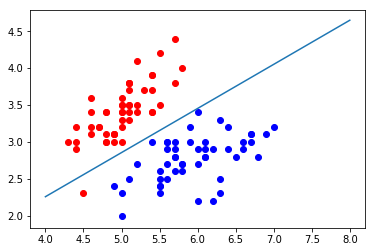

In [92]:
plt.scatter(X[y==0, 0], X[y==0, 1], color='r')
plt.scatter(X[y==1, 0], X[y==1, 1], color='b')
plt.plot(X1_plot, X2_plot)
plt.show()

# 有一个红点在绿色地区域内，其实这应该是训练数据集中的， 因为前面的测的准确度是1

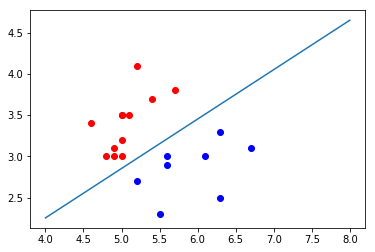

In [93]:
plt.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], color='r')
plt.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], color='b')
plt.plot(X1_plot, X2_plot)
plt.show()

In [106]:
# 封装函数来进行绘制决策边界

import numpy as np
from matplotlib.colors import ListedColormap

def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
    np.linspace(axis[0], axis[1], int((axis[1] - axis[0])*100)).reshape(-1, 1),# 不知道reshape()对不对
    np.linspace(axis[2], axis[3], int((axis[3] - axis[2])*100)).reshape(-1, 1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_predict = model.predict(X_new)  # 使用我们的model进行预测
    zz = y_predict.reshape(x0.shape)
    
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])# 预测的结果进行绘制
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)  

c:\users\xuyyuan\appdata\local\programs\python\python36\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


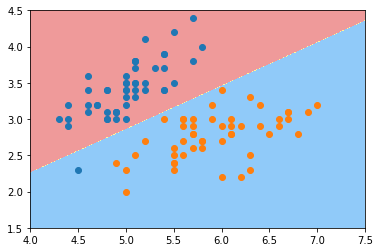

In [107]:
plot_decision_boundary(log_reg, axis=[4, 7.5, 1.5, 4.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

### kNN的决策边界

In [108]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [109]:
knn_clf.score(X_test, y_test)

1.0

c:\users\xuyyuan\appdata\local\programs\python\python36\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


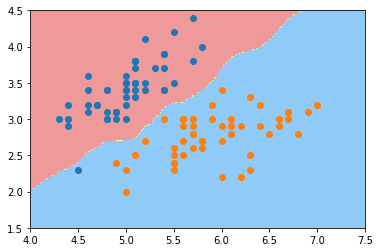

In [110]:
plot_decision_boundary(knn_clf, axis=[4, 7.5, 1.5, 4.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

In [116]:
knn_clf_all = KNeighborsClassifier()
knn_clf_all.fit(iris.data[:, :2], iris.target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

c:\users\xuyyuan\appdata\local\programs\python\python36\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


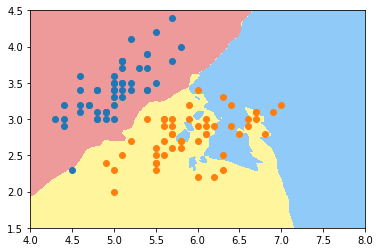

In [117]:
plot_decision_boundary(knn_clf_all, axis=[4, 8, 1.5, 4.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.show()

# 显然是过拟合的现象， 决策边界不规整，n越小，模型越复杂

In [118]:
knn_clf_all = KNeighborsClassifier(n_neighbors=50)
knn_clf_all.fit(iris.data[:, :2], iris.target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=50, p=2,
           weights='uniform')

c:\users\xuyyuan\appdata\local\programs\python\python36\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


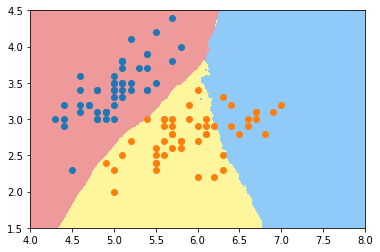

In [120]:
plot_decision_boundary(knn_clf_all, axis=[4, 8, 1.5, 4.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.show()

# k越大，模型越简单，对应的绘制的决策边界越规整， 分块越明显

## 逻辑回归中添加多项式特征

In [121]:
import numpy as np
import matplotlib.pyplot as plt

In [122]:
np.random.seed(666)
X = np.random.normal(0, 1., size=(200, 2))
y = np.array(X[:, 0]**2 + X[:, 1]**2 < 1.5, dtype='int')

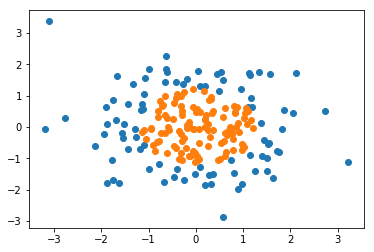

In [123]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

### 使用逻辑回归

In [124]:
from playML.LogisticRegression import LogisticRegression

In [125]:
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

In [126]:
log_reg.score(X, y)

0.605

In [129]:
import numpy as np
from matplotlib.colors import ListedColormap

def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
    np.linspace(axis[0], axis[1], int((axis[1] - axis[0])*100)).reshape(-1, 1),# 不知道reshape()对不对
    np.linspace(axis[2], axis[3], int((axis[3] - axis[2])*100)).reshape(-1, 1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_predict = model.predict(X_new)  
    zz = y_predict.reshape(x0.shape)
    
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])
    
    plt.contourf(x0, x1, zz, 5, cmap=custom_cmap) 

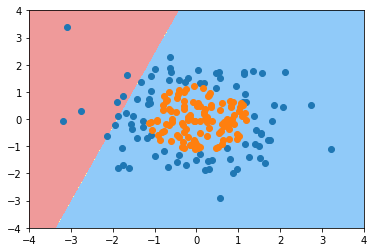

In [131]:
plot_decision_boundary(log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

# 显然有很多错误分类，最终导致我们模型准确度只有0.605左右

In [134]:
# 这里也可以使用管道Pipeline

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

def PolynomialLogisticRegression(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression())
    ])

In [137]:
poly_log_reg = PolynomialLogisticRegression(degree=2)
poly_log_reg.fit(X, y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_reg', LogisticRegression())])

In [139]:
poly_log_reg.score(X, y)

# 此时的分类准确度提高了很多

0.95

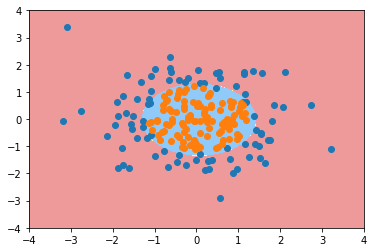

In [141]:
plot_decision_boundary(poly_log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

In [144]:
poly_log_reg2 = PolynomialLogisticRegression(degree=20)
poly_log_reg2.fit(X, y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=20, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_reg', LogisticRegression())])

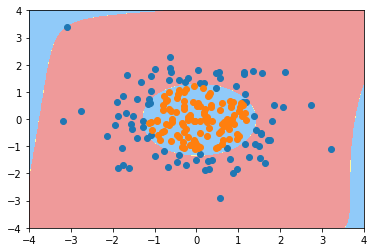

In [147]:
plot_decision_boundary(poly_log_reg2, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

# degree取得太大， 导致边界形状不规则。阶数（degre越大），模型越复杂，越容易产生过拟合的问题。可以通过减少degee值，还可以模型正则化
# 实际上，对于逻辑回归算法来说，由于真实的分类环境很少是用一根直线就能分类的，通常都要加上多项式，因此正则化必不可少

## 在逻辑回归中使用多项式特征（模型正则化）

In [148]:
# 模型引入多项式项，相应地模型就会变得过于复杂，产生过拟合的情况。而为了解决过拟合的现象，一个常规的方法是对模型添加正则化

In [166]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(666)
X = np.random.normal(0, 1, size=(200, 2))
y = np.array(X[:, 0]**2 + X[:, 1]<1.5, dtype='int')

In [167]:
# 添加一个噪音
for _ in range(20):
    y[np.random.randint(200)] = 1

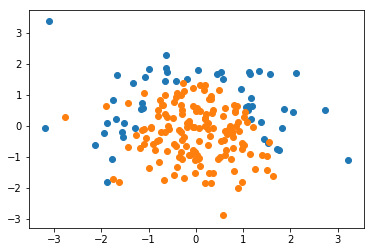

In [168]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

In [169]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

### 使用scikit-learn中的逻辑回归

In [170]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# 注意下面输出，C参数默认的值为1.0， penalty参数默认使用l2正则项

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [171]:
log_reg.score(X_train, y_train)

0.7933333333333333

In [172]:
log_reg.score(X_test, y_test)

0.86

In [173]:
def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
    np.linspace(axis[0], axis[1], int((axis[1] - axis[0])*100)).reshape(-1, 1),# 不知道reshape()对不对
    np.linspace(axis[2], axis[3], int((axis[3] - axis[2])*100)).reshape(-1, 1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_predict = model.predict(X_new)  
    zz = y_predict.reshape(x0.shape)
    
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])
    
    plt.contourf(x0, x1, zz, 5, cmap=custom_cmap) 

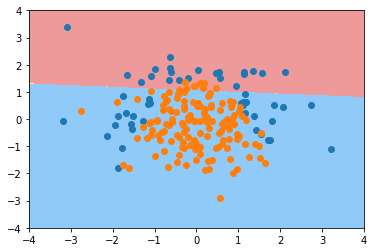

In [174]:
plot_decision_boundary(log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

In [175]:
# 下面尝试使用多项式项进行逻辑回归

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

def PolynomialLogisticRegression(degree):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression())
    ])

In [176]:
poly_log_reg = PolynomialLogisticRegression(degree=2)
poly_log_reg.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_reg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [177]:
poly_log_reg.score(X_train, y_train)

0.9133333333333333

In [179]:
poly_log_reg.score(X_test, y_test)

# 看一下模型的泛化能力

0.94

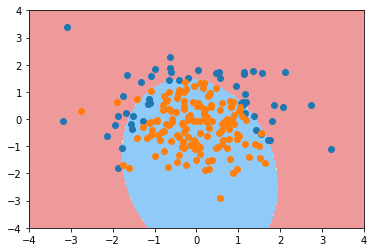

In [180]:
plot_decision_boundary(poly_log_reg, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

In [183]:
poly_log_reg2 = PolynomialLogisticRegression(degree=20)
poly_log_reg2.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=20, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_reg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [184]:
poly_log_reg2.score(X_train, y_train)

0.94

In [186]:
poly_log_reg2.score(X_test, y_test)

# 看看泛化能力，比上面degree=2的时候要小一点，这是因为我们的数据比较简单，产生的过拟合的现象不是很明显

0.92

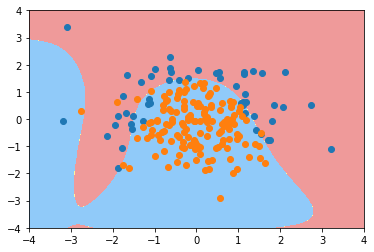

In [187]:
plot_decision_boundary(poly_log_reg2, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

In [189]:
# 用C参数进行模型正则化

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

def PolynomialLogisticRegression(degree, C):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression(C=C))
    ])

In [192]:
poly_log_reg3 = PolynomialLogisticRegression(degree=20, 0.1) # C比较小，其实就是让模型正则化的项起更大的作用，而模型准确度相应的损失函数起的作用要小一点
poly_log_reg3.fit(X_train, y_train)

SyntaxError: positional argument follows keyword argument (<ipython-input-192-cb77ae08526b>, line 1)

In [193]:
poly_log_reg3 = PolynomialLogisticRegression(degree=20, C=0.1) 
poly_log_reg3.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=20, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_reg', LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [194]:
poly_log_reg3.score(X_train, y_train)

0.8533333333333334

In [195]:
poly_log_reg3.score(X_test, y_test)

# 依然较差

0.92

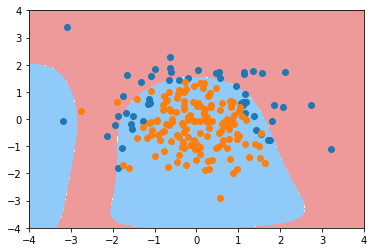

In [196]:
plot_decision_boundary(poly_log_reg3, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

# 情况稍微比上面的好一点

In [205]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

def PolynomialLogisticRegression(degree, C, penalty='l2'):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression(C=C, penalty=penalty))
    ])

In [206]:
poly_log_reg4 = PolynomialLogisticRegression(degree=20, C=0.1, penalty='l1') 
poly_log_reg4.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=20, include_bias=True, interaction_only=False)), ('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('log_reg', LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [207]:
poly_log_reg4.score(X_train, y_train)

0.8266666666666667

In [208]:
poly_log_reg4.score(X_test, y_test)

0.9

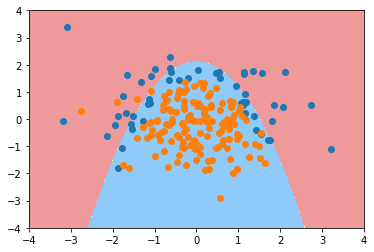

In [211]:
plot_decision_boundary(poly_log_reg4, axis=[-4, 4, -4, 4])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.show()

# 结果已经非常接近完美了，使大部分的theta为0了（因为我们这里已知是2阶的）
# 由于我们本身就知道他是使用二阶的多项式项生成的数据，所以degree等于20的时候，我们再怎么使用这种正则化的方式都无法达到degree=2的这种程度，
# 面对实际数据的时候，是不知道我们的degree是多少是合适的，为此，对于deree是多少， C是多少，正则项使用l1还是l2，他们都属于超参数，都需要进行网格搜索进行寻找

## OvR与OvO

In [1]:
# 逻辑回归只能解决二分类的问题，但是我们依然可以通过技术手段解决多分类的问题（扩展逻辑回归的应用场景）
# 解决多分类的问题：OvR与OvO 通用的方法哦！！！

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [3]:
iris = datasets.load_iris()
X = iris.data[:, :2]  # 使用两个特征，便于可视化
y= iris.target

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [5]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# 注意参数multi_class='ovr'，sklearn中的LogistcRegression默认值支持多分类任，并且支持的方式是OvR的方式

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [6]:
log_reg.score(X_test, y_test)

# 准确度不好，原因是我们值选取了2个特征，还有数据信息没有充分利用

0.6578947368421053

In [7]:
import numpy as np
from matplotlib.colors import ListedColormap

def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
    np.linspace(axis[0], axis[1], int((axis[1] - axis[0])*100)).reshape(-1, 1),# 不知道reshape()对不对
    np.linspace(axis[2], axis[3], int((axis[3] - axis[2])*100)).reshape(-1, 1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_predict = model.predict(X_new)  
    zz = y_predict.reshape(x0.shape)
    
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])
    
    plt.contourf(x0, x1, zz, 5, cmap=custom_cmap) 

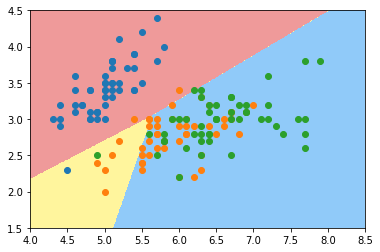

In [8]:
plot_decision_boundary(log_reg, axis=[4, 8.5, 1.5, 4.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.show()

In [9]:
log_reg2 = LogisticRegression(multi_class='multinomial', solver='newton-cg')  # 不是使用梯度下降法进行计算的的

# 注意参数呀！
# 当使用OVO的手段进行多分类任务的时候，默认的计算方式liblinear就会失效，这里选择newton-cg的方式计算

In [10]:
log_reg2.fit(X_train, y_train)
log_reg2.score(X_test, y_test)

# ovo的方式，显然比上面更加准确

0.7894736842105263

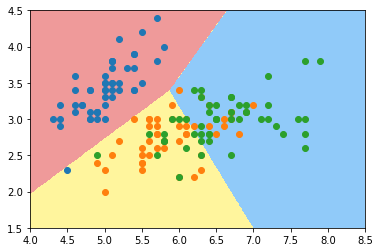

In [12]:
plot_decision_boundary(log_reg2, axis=[4, 8.5, 1.5, 4.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.show()

# 比ovr更准确

### 使用所有的数据

In [13]:
X = iris.data  # 使用所有的数据
y= iris.target

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [14]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

# 使用所有数据特征明显效果要好啊

0.9473684210526315

In [15]:
log_reg2 = LogisticRegression(multi_class='multinomial', solver='newton-cg')
log_reg2.fit(X_train, y_train)
log_reg2.score(X_test, y_test)

1.0

In [16]:
# 数据较小，无法比较耗时，建议使用手写数据进行分类（选择OVr与OVO）

### OvR and OvO

In [17]:
# 对于LogisticRegression来说，sklearn自动融合了OvR与OvO的方式进行多分类的任务
# 同时sklearn还为我们提供了两个类，这两个类分别用来支持OvR与OvO这两种方式，这样我们可以用任意的二分类算法应用这两个类实现多分类任务。

In [19]:
from sklearn.multiclass import OneVsRestClassifier

ovr = OneVsRestClassifier(log_reg) # 传参是，传进去一个二分类器
ovr.fit(X_train, y_train)
ovr.score(X_test, y_test)

# 看看结果0.9473684210526315与上面一节里对应的结果是一样的

0.9473684210526315

In [21]:
from sklearn.multiclass import OneVsOneClassifier

ovo = OneVsOneClassifier(log_reg)
ovo.fit(X_train, y_train)
ovo.score(X_test, y_test)

# 看看结果1.0与上面一节里对应的结果是一样的

1.0

In [22]:
# 十分建议自己实现一遍OvO和OvR这样的Classfier

In [23]:
# 逻辑回归算法拓展了线性回归的方式，通过计算概率的方式将一个回归问题转换为一个分类问题。
# 其实对于分类任务还有很多值得讨论的地方，其中一个非常重要的地方是怎样评价分类器对应的准确度，之前的学习中一直使用accuracy_score的方式，其实这种方式在一些情况下是有巨大缺陷的